In [3]:
import os
os.chdir('/Users/asherlantz/Desktop/physics/FairSampling')
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import tfim_sk_infd.services.entropy_service as tfe
import json

DB_PATH = 'backend/database/local.db'

In [8]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Define your SQL query

query = """
SELECT fs_od_var, fs_qfi
FROM InstanceMetrics
WHERE N = 8
"""

# Execute the query and read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

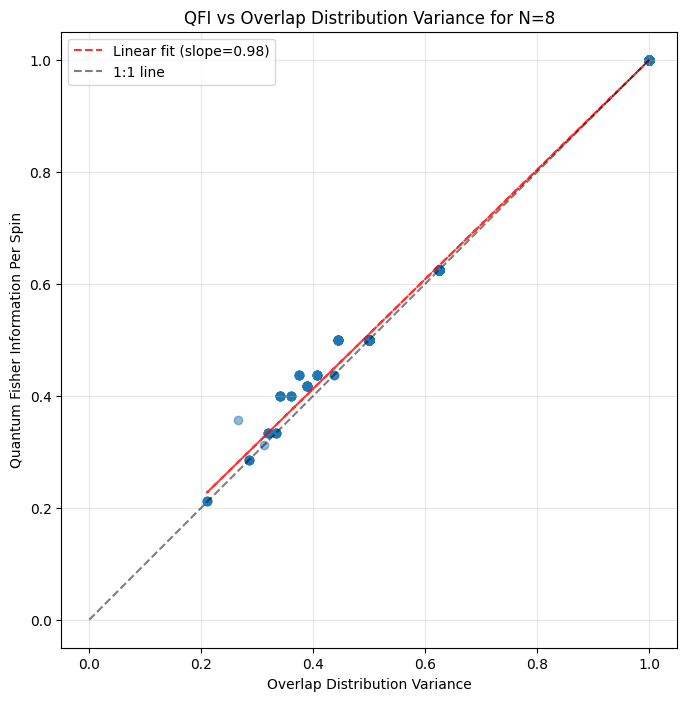

In [9]:
# Create a scatter plot with square aspect ratio
plt.figure(figsize=(8, 8))

# Plot scatter points
plt.scatter(df['fs_od_var'], df['fs_qfi'], alpha=0.5)

# Calculate and plot linear fit
z = np.polyfit(df['fs_od_var'], df['fs_qfi'], 1)
p = np.poly1d(z)
plt.plot(df['fs_od_var'], p(df['fs_od_var']), "r--", alpha=0.8, label=f'Linear fit (slope={z[0]:.2f})')

# Add 1:1 line
max_val = max(df['fs_od_var'].max(), df['fs_qfi'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='1:1 line')

# Add labels and title
plt.xlabel('Overlap Distribution Variance')
plt.ylabel('Quantum Fisher Information Per Spin')
plt.title('QFI vs Overlap Distribution Variance for N=8')

# Make axes equal and add grid
plt.axis('square')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()